# Homework 4: Neutrons in a gravitational field (20 points)

Group Members: Julius Franke (el442, juliusttf@gmail.com), Erik Meister (kd400, erik.meister@me.com), Eugen Dizer (qo452, eugen9898@web.de)

Due on Friday, 22.05.2020.

In [78]:
#Load standard libraries
import numpy as np   
import matplotlib.pyplot as plt   
%matplotlib inline

Another interesting application of the Numerov algorithm is the calculation of stationary states $\Psi(z)$ of neutrons in the gravitational field of the Earth. For small changes in the vertical amplitude $z$ the potential can be expressed as $V(z) = mgz$ for $z \geq 0$. Place a perfectly reflecting horizontal mirror at $z = 0$ so that $V(z) = \infty$ for $z < 0$. Neutrons that all onto the mirror are reflected upwards, and so we only seek solutions for $z \geq 0$. After a proper choice of length and energy units the Schrödinger equation for this system can be rewritten as

$$ \psi''(x) + (\varepsilon - x)\psi(x) = 0 ,$$

where $x = z/z_0$ with $z_0 = \left(\frac{\hbar^2}{2 m^2 g}\right)^{1/3}$ and $\varepsilon = E/E_0$ with $E_0 = \frac{\hbar^2}{2 z_0^2 m}$. For more information, have a look at the [Nature Paper](https://www.nature.com/articles/415297a.pdf) or the [Article in German](https://www.uni-heidelberg.de/presse/ruca/ruca03-2/schwer.html).

We will investigate this problem with the Numerov algorithm which is a highly accurate method for special variants of Sturm-Liouville differential equations of the type

\begin{align}
y''(x) + k(x) y(x) = 0.
\end{align}

It is given by 

\begin{align}
\left(1 + \frac{1}{12} h^2 k_{n+1}\right) y_{n+1} = 2 \left(1 - \frac{5}{12} h^2 k_n\right) y_n - \left(1 + \frac{1}{12} h^2 k_{n-1}\right) y_{n-1} + \mathcal{O}(h^6)
\end{align}

and provides 6th order accuracy by using the three values $y_n$, $y_{n-1}$, $y_{n+1}$ with $k_i = k(x_i)$ and $y_i = y(x_i)$.

A guide on how to choose $y_0$ and $y_1$ is given in this [Paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.430.8942&rep=rep1&type=pdf).

In the following, we will choose $y_0$ and $y_1$ as follows: Since the potential is infinite at $x = 0$, we will set $y_0 = 0$ in order to satisfy the continuity condition (since the wave function should be zero for $x < 0$). $y_1$ has to be calculated e.g. with the Runge-Kutta scheme or with something else to be as close as possible to the "true" solution. In our case, we will set it to $y_1 = 0.3$. We choose a step size of $h = 0.05$.

In [96]:
#Implementation of the Numerov algorithm with starting values 
#y0 = 0 and y1 = 0.3
#epsilon = energy eigenvalue
#h = step size
#T = integration limit
def numerov_plot(epsilon, h, T):
    x = np.arange(0,T+h,h)
    y = np.zeros(len(x))
    
    k = epsilon - x
    
    y[0] = 0
    y[1] = 0.3
        
    for i in range(1,len(x)-1,1):
        y[i+1] = (2*(1-5/12*h**2*k[i])*y[i]-(1+1/12*h**2*k[i-1])*y[i-1])/(1+h**2*k[i+1]/12)
    
    plt.plot(x, y, label= r'$\varepsilon={:.{}f}$'.format(epsilon,4))
    plt.ylim(-100,100)
    plt.legend(bbox_to_anchor=(1, 1))

### 1. Use the Numerov method to solve this differential equation. Choose some values of $\varepsilon$ and plot the solution from $x = 0$ to $x \gg \varepsilon$ (i.e. well into the classically forbidden zone). We are interested in the asymptotic behavior of the solution for large $x$, i.e. whether it goes to positive infinity or negative. 

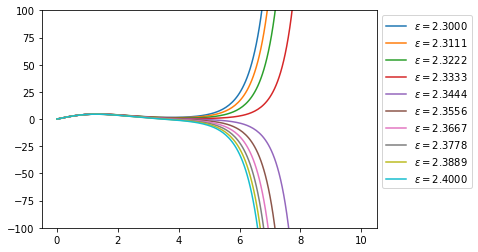

In [97]:
#Some values for epsilon
epsilon = np.linspace(2.3,2.4,10)

for e in epsilon:
    numerov_plot(e, 0.05, 10)

### Show (plot) two solutions obtained from your program (for two values of $\varepsilon$), one with positive and one with negative asymptotic behaviour.

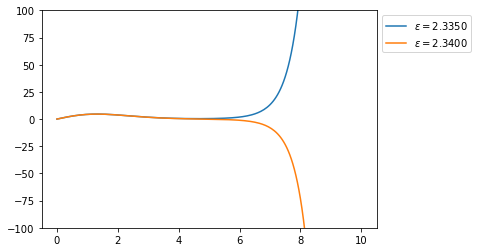

In [98]:
numerov_plot(2.335, 0.05, 10)
numerov_plot(2.34, 0.05, 10)

### 2. The eigenvalues $\varepsilon_n$ of Schrödinger’s equation belong to normalizable eigenfunctions with $\psi(x) \rightarrow 0$ for $x \rightarrow \infty$. It means that while varying $\varepsilon_n$ from smaller to larger values, the function $\psi(x)$ for $x \rightarrow \infty$ changes sign. Use this property to determine the eigenvalues $\varepsilon_n$ of the first three bound states to 2 decimals behind the comma.

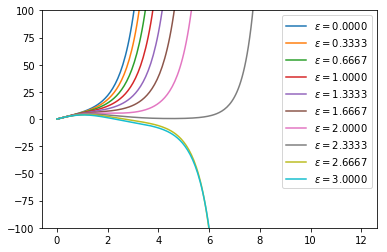

In [99]:
#Finding the first eigenvalue
epsilon = np.linspace(0,3,10)

for e in epsilon:
    numerov_plot(e, 0.05, 12)

So it seems that the first eigenvalue is between 2.33 and 2.6! Let's investigate this turn off point!

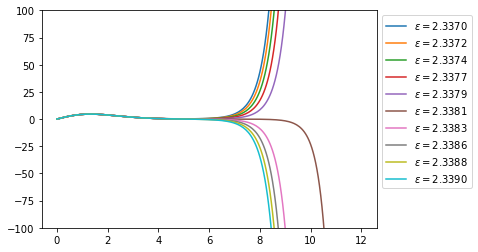

In [100]:
#Determining the first eigenvalue
epsilon = np.linspace(2.337,2.339,10)

for e in epsilon:
    numerov_plot(e, 0.05, 12)

The solution with $\varepsilon_1 = 2.338$ is the most stable and lies in the turn off region! So this is the first eigenvalue.

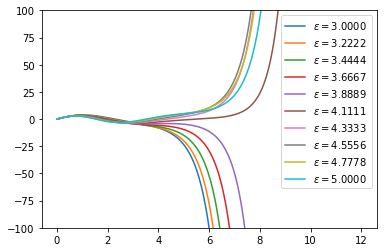

In [101]:
#Finding the second eigenvalue
epsilon = np.linspace(3,5,10)

for e in epsilon:
    numerov_plot(e, 0.05, 12)

Again, we will look closer at the region between $\varepsilon = 3.89$ and $\varepsilon = 4.11$:

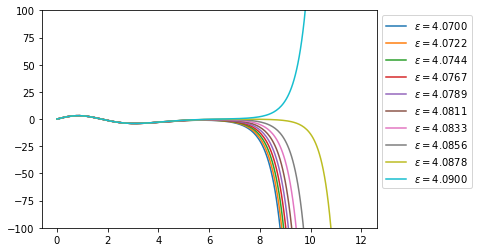

In [106]:
#Determining the second eigenvalue
epsilon = np.linspace(4.07,4.09,10)

for e in epsilon:
    numerov_plot(e, 0.05, 12)

We conclude $\varepsilon_2 = 4.088$.

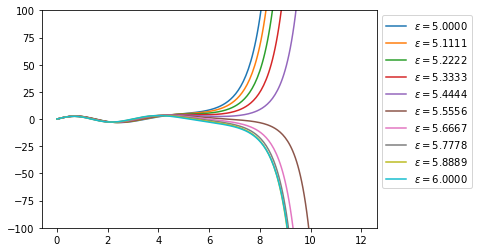

In [109]:
#Finding the third eigenvalue
epsilon = np.linspace(5,6,10)

for e in epsilon:
    numerov_plot(e, 0.05, 12)

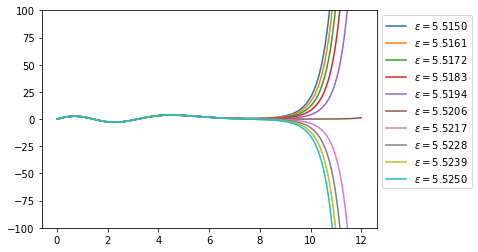

In [116]:
#Determining the third eigenvalue
epsilon = np.linspace(5.515,5.525,10)

for e in epsilon:
    numerov_plot(e, 0.05, 12)

We conclude $\varepsilon_3 = 5.5206$.